### Discovery
1. dropout rate can greatly influence the initial learning curve
2. can increase the batch size for larger image size

### Model Specification
Model: pretrained resnet34 | Data: 30 classes | Dropout: 0.05 | Max Size: 299 | Remarks: 3 extra fully connected layers [512, 256, 128]

Result: After a series of training, val acc converge to 75%

*[21/01/2019]*

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import sys
sys.path.append('/home/r8user2/fastai/old')
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *
import matplotlib.pyplot as plt

In [2]:
PATH = '/home/r8user2/Documents/HY/dress_data/alex_workplace/dressdata_project/git_workplace/selected_gd_data_30'
CPU_WORKERS = 60
sz = 224

In [3]:
arch = resnet34
tfms = tfms_from_model(resnet34,
                       sz,
                       aug_tfms = transforms_side_on,
                       max_zoom = 1.1)

In [5]:
# For upgrade image size later
def get_data(sz, bs = 64):
    tfms = tfms_from_model(arch, sz, aug_tfms = transforms_side_on, max_zoom = 1.1)
    data = ImageClassifierData.from_paths(PATH,
                                          tfms = tfms,
                                          trn_name = 'imgtrain',
                                          val_name = 'imgval',
                                          test_name = 'imgtest',
                                          test_with_labels = True,
                                          num_workers = CPU_WORKERS,
                                          bs = bs)
    return data if sz>300 else data.resize(340, 'tmp_30class')

In [6]:
data = get_data(sz)

### Find Optimal Dropout Rate

In [18]:
# optimal dropout rate
# default ps = [0.25, 0.5]
import numpy as np
lr=1e-2

dropout_rate=[]
min_val_loss=[]
for dropout in np.arange(0.0, 0.2, 0.05):
    dropout_rate.append(dropout)
    print('Dropout rate = %s' % dropout)
    learn = ConvLearner.pretrained(arch, data, ps = dropout, xtra_fc = [512, 256, 128], precompute = True)
    _, ep_vals = learn.fit(lr, 10, get_ep_vals=True);
    min_val_loss.append(min(l[1] for l in list(ep_vals.values())))

Dropout rate = 0.0


epoch      trn_loss   val_loss   accuracy                     
    0      2.239174   2.176426   0.37254   
    1      1.958935   2.030285   0.421337                     
    2      1.781696   1.962471   0.439751                     
    3      1.669451   1.924614   0.464265                     
    4      1.480808   1.8844     0.480723                     
    5      1.387214   1.882468   0.497756                     
    6      1.297446   1.89229    0.504316                     
    7      1.176855   1.91509    0.515825                     
    8      1.056432   1.913271   0.527103                     
    9      0.983698   1.976269   0.526528                      
Dropout rate = 0.05


epoch      trn_loss   val_loss   accuracy                     
    0      2.339417   2.217783   0.35896   
    1      2.128063   2.08727    0.396363                     
    2      1.974361   1.980211   0.433537                     
    3      1.872243   1.906961   0.456324                     
    4      1.790281   1.88575    0.460122                     
    5      1.679775   1.833021   0.481643                     
    6      1.549239   1.812533   0.49016                      
    7      1.499077   1.7909     0.502014                     
    8      1.423354   1.771528   0.509495                     
    9      1.327042   1.754591   0.521694                     
Dropout rate = 0.1


epoch      trn_loss   val_loss   accuracy                     
    0      2.434397   2.261724   0.347451  
    1      2.237014   2.11054    0.388307                     
    2      2.115851   2.021001   0.41846                      
    3      2.036823   1.962512   0.432271                     
    4      1.956994   1.91014    0.45103                      
    5      1.876522   1.86514    0.465646                     
    6      1.774911   1.836605   0.474968                     
    7      1.701537   1.807313   0.485902                     
    8      1.643067   1.78451    0.495799                     
    9      1.612893   1.769188   0.49695                      
Dropout rate = 0.15000000000000002


epoch      trn_loss   val_loss   accuracy                     
    0      2.470451   2.307846   0.334791  
    1      2.344436   2.164151   0.364599                     
    2      2.222888   2.087974   0.396478                     
    3      2.138324   2.025872   0.415583                     
    4      2.093794   1.982051   0.42525                      
    5      2.039828   1.929973   0.436874                     
    6      1.969516   1.905159   0.451145                     
    7      1.868247   1.860537   0.460007                     
    8      1.842177   1.837347   0.469329                     
    9      1.822501   1.81117    0.482104                     


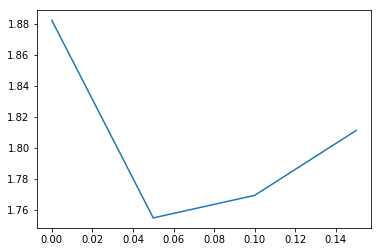

In [19]:
plt.plot(dropout_rate, min_val_loss)

In [7]:
learn = ConvLearner.pretrained(arch, data, ps = 0.05, xtra_fc = [512, 256, 128], precompute = True)

100%|██████████| 136/136 [00:48<00:00,  2.80it/s]


In [11]:
learn.summary()

OrderedDict([('Conv2d-1',
              OrderedDict([('input_shape', [-1, 3, 224, 224]),
                           ('output_shape', [-1, 64, 112, 112]),
                           ('trainable', False),
                           ('nb_params', 9408)])),
             ('BatchNorm2d-2',
              OrderedDict([('input_shape', [-1, 64, 112, 112]),
                           ('output_shape', [-1, 64, 112, 112]),
                           ('trainable', False),
                           ('nb_params', 128)])),
             ('ReLU-3',
              OrderedDict([('input_shape', [-1, 64, 112, 112]),
                           ('output_shape', [-1, 64, 112, 112]),
                           ('nb_params', 0)])),
             ('MaxPool2d-4',
              OrderedDict([('input_shape', [-1, 64, 112, 112]),
                           ('output_shape', [-1, 64, 56, 56]),
                           ('nb_params', 0)])),
             ('Conv2d-5',
              OrderedDict([('input_shape', [-1, 64, 56, 

### Learning Rate Finder

In [21]:
learn.save('temp_resnet34_30class')

In [22]:
learn.lr_find()

 87%|████████▋ | 939/1084 [00:21<00:03, 40.16it/s, loss=4.17]

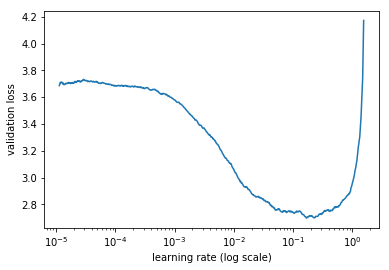

In [23]:
learn.sched.plot()

In [24]:
learn.load('temp_resnet34_30class')

### Train Last Layer with Precompute = T

In [25]:
learn.precompute = True
learn.fit(1e-2, 5)

epoch      trn_loss   val_loss   accuracy                     
    0      2.306927   2.228435   0.36011   
    1      2.134622   2.064627   0.406836                     
    2      1.985661   1.981293   0.427897                     
    3      1.815074   1.894577   0.46346                      
    4      1.757998   1.862044   0.477961                     


[array([1.86204]), 0.47796063997183286]

In [27]:
learn.save('temp_resnet34_30class')

### Train Last Layer with Precompute = F and Enable Data Augmentation

In [28]:
# with data augmentation
learn.precompute = False
%time learn.fit(1e-2, 4, cycle_len = 3)

epoch      trn_loss   val_loss   accuracy                     
    0      1.882978   1.808264   0.4836    
    1      1.761615   1.749396   0.500748                     
    2      1.688969   1.727028   0.508459                     
    3      1.792758   1.763419   0.493037                     
    4      1.676708   1.709808   0.511106                     
    5      1.560519   1.689298   0.522039                     
    6      1.716298   1.725291   0.507308                     
    7      1.568483   1.672851   0.528024                     
    8      1.496903   1.664784   0.533318                     
    9      1.679051   1.705956   0.51617                      
    10     1.529111   1.655595   0.539418                     
    11     1.419954   1.63714    0.542755                     
CPU times: user 11h 53min 7s, sys: 23h 17min 18s, total: 1d 11h 10min 26s
Wall time: 1h 39min 19s


[array([1.63714]), 0.5427552077579256]

In [29]:
%time learn.fit(1e-2, 2, cycle_len = 5)

epoch      trn_loss   val_loss   accuracy                     
    0      1.585054   1.698432   0.521234  
    1      1.532668   1.66571    0.531246                     
    2      1.419807   1.635223   0.543906                     
    3      1.333521   1.61447    0.547704                     
    4      1.324872   1.611689   0.551387                     
    5      1.536592   1.666179   0.532858                     
    6      1.44246    1.630688   0.544021                     
    7      1.365582   1.615543   0.551157                     
    8      1.282557   1.592478   0.560824                     
    9      1.219168   1.58265    0.563126                     
CPU times: user 10h 2min 5s, sys: 19h 31min 41s, total: 1d 5h 33min 47s
Wall time: 1h 23min 31s


[array([1.58265]), 0.5631257913126085]

In [31]:
learn.save('temp_resnet34_30class')

### Unfreeze and Train All Layers

In [32]:
import numpy as np
lrs = np.array([1e-4, 1e-3, 1e-2])

In [33]:
learn.unfreeze()
%time learn.fit(lrs, 1, cycle_len = 2)

epoch      trn_loss   val_loss   accuracy                     
    0      1.445808   1.49133    0.569686  
    1      1.169595   1.417306   0.592819                     
CPU times: user 2h 20min 7s, sys: 4h 1min 10s, total: 6h 21min 18s
Wall time: 37min 26s


[array([1.41731]), 0.5928185061915092]

In [34]:
%time learn.fit(lrs, 11, cycle_len = 3)

epoch      trn_loss   val_loss   accuracy                     
    0      1.300838   1.433223   0.58856   
    1      1.021686   1.324114   0.628381                     
    2      0.845933   1.298573   0.637703                      
    3      1.120139   1.341868   0.619634                      
    4      0.82885    1.247797   0.651744                      
    5      0.709182   1.24298    0.658304                      
    6      0.92754    1.299467   0.645874                      
    7      0.705073   1.215261   0.670388                      
    8      0.583841   1.210685   0.679825                      
    9      0.834067   1.26781    0.660605                      
    10     0.624488   1.209134   0.683853                      
    11     0.448716   1.199624   0.687536                      
    12     0.690244   1.242728   0.675797                      
    13     0.522218   1.196627   0.691564                      
    14     0.386579   1.200563   0.696858                     

[array([1.24395]), 0.7255150189758074]

In [35]:
learn.save('temp_resnet34_30class')

### Train with Bigger Image Size (299)

In [8]:
learn.set_data(get_data(299, 128))
learn.freeze()
learn.precompute = True

In [43]:
%time learn.fit(1e-2, 3, cycle_len = 3)

epoch      trn_loss   val_loss   accuracy                     
    0      1.282625   1.609396   0.552538  
    1      1.075613   1.586071   0.571872                     
    2      0.933426   1.577997   0.574059                      
    3      1.105971   1.576555   0.577512                     
    4      0.89481    1.573606   0.588445                      
    5      0.78353    1.578989   0.589596                      
    6      0.930119   1.601622   0.580849                      
    7      0.807545   1.61146    0.590747                      
    8      0.680102   1.620541   0.592588                      
CPU times: user 3min 44s, sys: 2min 54s, total: 6min 38s
Wall time: 4min 17s


[array([1.62054]), 0.5925883302165609]

In [44]:
%time learn.fit(1e-2, 3, cycle_len = 4)

epoch      trn_loss   val_loss   accuracy                      
    0      0.891183   1.644766   0.585568  
    1      0.768577   1.618596   0.601565                      
    2      0.666009   1.625882   0.609506                      
    3      0.578926   1.631259   0.606974                      
    4      0.83034    1.655713   0.591553                      
    5      0.718665   1.678539   0.600414                      
    6      0.578743   1.663276   0.610197                      
    7      0.505162   1.66823    0.606744                      
    8      0.762383   1.717096   0.598228                      
    9      0.648512   1.712119   0.601105                      
    10     0.527741   1.723483   0.609506                      
    11     0.470363   1.725275   0.609736                      
CPU times: user 5min 12s, sys: 3min 37s, total: 8min 49s
Wall time: 5min 41s


[array([1.72527]), 0.6097364485270684]

In [45]:
# benchmark: 
learn.precompute = False
%time learn.fit(1e-2, 1, cycle_len = 4)

epoch      trn_loss   val_loss   accuracy                    
    0      0.585914   1.293569   0.675337  
    1      0.502187   1.261699   0.688802                    
    2      0.453379   1.254277   0.692485                    
    3      0.415375   1.250366   0.692945                    
CPU times: user 3h 54min 57s, sys: 6h 23min 35s, total: 10h 18min 32s
Wall time: 54min 14s


[array([1.25037]), 0.6929451033605065]

In [46]:
lrs = np.array([1e-4, 1e-3, 1e-2])
learn.unfreeze()
%time learn.fit(lrs, 6, cycle_len = 3)

epoch      trn_loss   val_loss   accuracy                    
    0      0.441387   1.219446   0.705029  
    1      0.30013    1.174988   0.723559                    
    2      0.258381   1.176209   0.727126                    
    3      0.31237    1.211362   0.719761                    
    4      0.245744   1.212997   0.727356                    
    5      0.205409   1.206358   0.729543                    
    6      0.256129   1.241452   0.730924                    
    7      0.209333   1.227602   0.736448                    
    8      0.175197   1.225013   0.735067                    
    9      0.228876   1.274      0.729888                    
    10     0.187936   1.249505   0.735067                    
    11     0.163191   1.244771   0.739901                    
    12     0.209153   1.272461   0.735298                    
    13     0.170288   1.252388   0.73921                     
    14     0.137601   1.251619   0.740592                    
    15     0.188341   1.27

[array([1.25534]), 0.743353665615887]

In [11]:
import numpy as np
lrs = np.array([1e-4, 1e-3, 1e-2])
%time learn.fit(lrs, 4, cycle_len = 8)

epoch      trn_loss   val_loss   accuracy                     
    0      0.12601    1.271744   0.742778  
    1      0.125924   1.274571   0.746346                    
    2      0.124795   1.289027   0.743929                    
    3      0.114341   1.298109   0.745195                    
    4      0.115485   1.296367   0.743699                    
    5      0.110357   1.299762   0.74531                     
    6      0.105282   1.297612   0.745771                    
    7      0.106471   1.302227   0.74531                      
    8      0.119766   1.311766   0.74508                     
    9      0.115042   1.308497   0.743008                    
    10     0.116871   1.309532   0.746231                    
    11     0.121556   1.316197   0.744274                    
    12     0.1152     1.316732   0.746001                     
    13     0.104193   1.317117   0.745886                     
    14     0.09915    1.314499   0.746461                     
    15     0.093225  

[array([1.34759]), 0.7473817471942579]

In [13]:
%time learn.fit(lrs, 3, cycle_len = 12)

epoch      trn_loss   val_loss   accuracy                     
    0      0.095976   1.339812   0.746231  
    1      0.110782   1.349458   0.746231                     
    2      0.104341   1.35182    0.747957                     
    3      0.109754   1.363169   0.74508                      
    4      0.104518   1.353962   0.747382                     
    5      0.107255   1.351384   0.746691                     
    6      0.09985    1.361717   0.747612                     
    7      0.091313   1.361822   0.747497                     
    8      0.095381   1.366104   0.747612                     
    9      0.08769    1.363098   0.746461                     
    10     0.092439   1.359529   0.747036                     
    11     0.088627   1.35829    0.746576                     
    12     0.110555   1.36217    0.746346                     
    13     0.104132   1.366278   0.749223                     
    14     0.100253   1.368976   0.747267                     
    15     

[array([1.37139]), 0.7495684199989535]

In [69]:
learn.save('temp_resnet32_30class')

In [67]:
def vis_loss_acc(learn, figsize = (8, 12)):
    n_epoch = learn.sched.epoch
    bs = int(len(learn.sched.losses) / n_epoch)
    # validation loss
    val_loss = learn.sched.val_losses
    trn_loss = [learn.sched.losses[i] for i in range(bs-1, n_epoch*bs, bs)]
    # validation accuracy
    val_acc = learn.sched.rec_metrics
    # visualization
    fig, ax = plt.subplots(2, 1, figsize = figsize)
    iters = list(range(n_epoch))
    ax[0].plot(iters, val_loss, label = 'Validation Loss')
    ax[0].plot(iters, trn_loss, label = 'Training Loss')
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylabel('Loss')
    ax[0].legend(loc = 'upper right')
    ax[1].plot(iters, val_acc)
    ax[1].set_xlabel('Epoch')
    ax[1].set_ylabel('Accuracy');

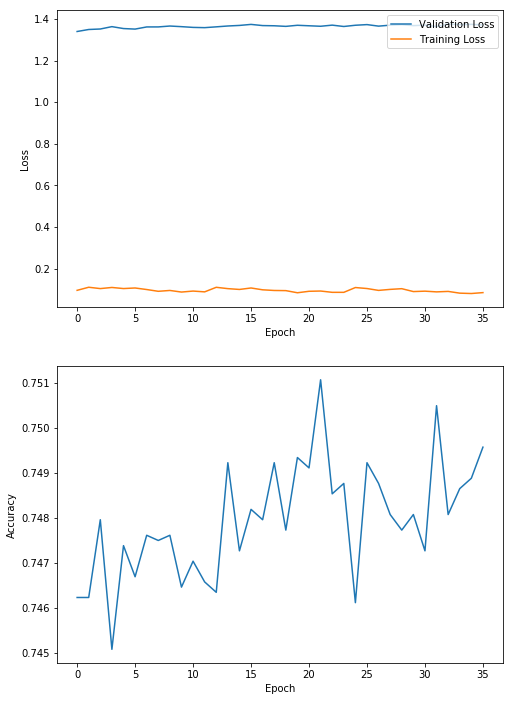

In [68]:
# Seems the model has been trained to the limit
vis_loss_acc(learn)

### Test Time Augmentation

In [15]:
val_log_preds, val_y = learn.TTA()

In [17]:
test_log_preds, test_y = learn.TTA(is_test = True)

In [18]:
def accuracy_custom(preds, tags):
    preds_tags = np.argmax(preds, 1)
    n = len(tags)
    return sum(preds_tags == tags)/n

In [35]:
# Soft ensemble to aggregate augmented results
val_probs = np.mean(np.exp(val_log_preds), 0)
val_acc_wTTA = accuracy_custom(val_probs, val_y)
test_probs = np.mean(np.exp(test_log_preds), 0)
test_acc_wTTA = accuracy_custom(test_probs, test_y)
print('Validation set accuracy with TTA = %f' % round(val_acc_wTTA,3))
print('Test set accuracy with TTA = %f' % round(test_acc_wTTA, 3))

Validation set accuracy with TTA = 0.756000
Test set accuracy with TTA = 0.745000


In [36]:
# test set performance without TTA
val_log_preds_woTTA = learn.predict()
val_acc_woTTA = accuracy_custom(val_log_preds_woTTA, val_y)
test_log_preds_woTTA = learn.predict(is_test= True)
test_acc_woTTA = accuracy_custom(test_log_preds_woTTA, test_y)
print('Validation set accuracy without TTA = %f' % round(val_acc_woTTA, 3))
print('Test set accuracy without TTA = %f' % round(test_acc_woTTA, 3))

Validation set accuracy without TTA = 0.750000
Test set accuracy without TTA = 0.736000


### Analysis of Result

In [40]:
# Construct confusion matrix
preds = np.argmax(probs, axis = 1)

[[175   2   3  10  10   2   4   1   4   7   6   1   3   0   2   3   3   7   6   9   1   0   2   6   3   2
    1  14   6   8]
 [  1 220   1   2   4   1   8   2   4   3   2   2   1   1   0   4   3   5   0   9   1   0   7   0   2   1
    0   7   6   3]
 [  6   0 210   6   1   0   9   1   6  17   5   0   2   4   0   1   6   1   1   1   1   1   2   1   1   2
    1   0   7   5]
 [ 11   5   1 200   5   1   3   4   9   0   2   0   6   7   0   3   0   5   5   2   0   0   3   0   7   4
    3   2   4   4]
 [  3   1   0   2 203   1   5  21   0   0   5   2   1   1   1  10   0   1   7   8   1   0   2   0   3   3
    4  11   0   2]
 [  6   0   0   2   2 226  12   0   9   2   2   5   3   1   0   0   2   2   3   0   0   1   3   3   1   1
    2   2   7   3]
 [  8   3   0   6   1   7 214   0   1   0   4   8   1   1   0   2   0   1   1   1   0   0   9   1   2   3
    5   5   8   8]
 [  6   1   1   4  19   3   0 192   3   1  12   1   1   0   1   6   0   3  12   1   0   1   4   0   6   3
    2  10   4   2]


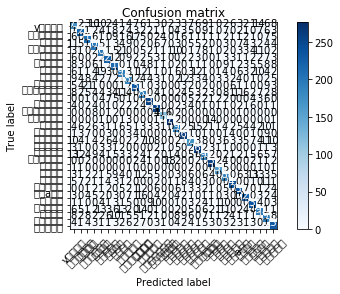

In [41]:
# Prediction with TTA
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)
plot_confusion_matrix(cm, data.classes);